In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('employee.csv')

### Attrition Definition Background

Employee Attrition somtimes can be interchangable as employee turnover

You can find several differences on how people view Employee Attrition. Some people differentiate on the way employee leaves the company to differentiate employee turnover, in this case they describe Employee Attrition as the loss of an employee through a naturally occurring process such as retirement, elimination of position, employee passing away or health reasons, while employee turnover usually viewed more negative such as resignation to find a better job, or terminated because of poor performance

There are also people describe Employee Attrition as voluntary and involuntary and while the difference with turnover is how turnover is calculated even when the position is filled while attrition only calculated when that position is not yet filled.

==============================================================================================================================
Because there are no exact date or period in the data, its challenging to calculte the Attrition Rate

However for this EDA purpose i assume that Attrition is just an indicator when people quit their job (wether it is voluntary or involuntary) and i also assume that this data is in 1 year period, and because of time limit, i can only analyse few of the variable

Before i describe the business problem and goals, i will take a look at the data overview

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
#Check total, type, and null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [18]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [11]:
# Checking the maximum age (to take retirement into consideration)
df['Age'].max()

60

Since the maximume age in this company is 60 and assuming that the retirement age in that country is 65, then we dont have to take retirement into consideration

In [15]:
# Describe employee with attrition (quit)
df[df['Attrition']== 'Yes'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,237.0,33.607595,9.689350,18.0,28.0,32.0,39.0,58.0
DailyRate,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0
DistanceFromHome,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0
Education,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0
EmployeeCount,237.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,237.0,1010.345992,580.750572,1.0,514.0,1017.0,1486.0,2055.0
EnvironmentSatisfaction,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0
HourlyRate,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0
JobInvolvement,237.0,2.518987,0.773405,1.0,2.0,3.0,3.0,4.0
JobLevel,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0


In [14]:
# Describe employee without attrition
df[df['Attrition']== 'No'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1233.0,37.561233,8.888360,18.0,31.0,36.0,43.0,60.0
DailyRate,1233.0,812.504461,403.208379,102.0,477.0,817.0,1176.0,1499.0
DistanceFromHome,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
Education,1233.0,2.927007,1.027002,1.0,2.0,3.0,4.0,5.0
EmployeeCount,1233.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1233.0,1027.656123,606.217074,2.0,483.0,1022.0,1574.0,2068.0
EnvironmentSatisfaction,1233.0,2.771290,1.071132,1.0,2.0,3.0,4.0,4.0
HourlyRate,1233.0,65.952149,20.380754,30.0,48.0,66.0,83.0,100.0
JobInvolvement,1233.0,2.770479,0.692050,1.0,2.0,3.0,3.0,4.0
JobLevel,1233.0,2.145985,1.117933,1.0,1.0,2.0,3.0,5.0


In [17]:
# Percentage of employee attrition
df['Attrition'].value_counts(normalize=True) * 100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

### Business Problem

The company Attrition percentage is 16.1% which can be considered high, this can be costly considering train an employee cost money. There is also a chance that a potential good performing employee are quitting, that is why such high number of attrition is problematic.

### Goals

My goals is to analyse what major factor might led employee to quits and how to maintain employee from quitting.

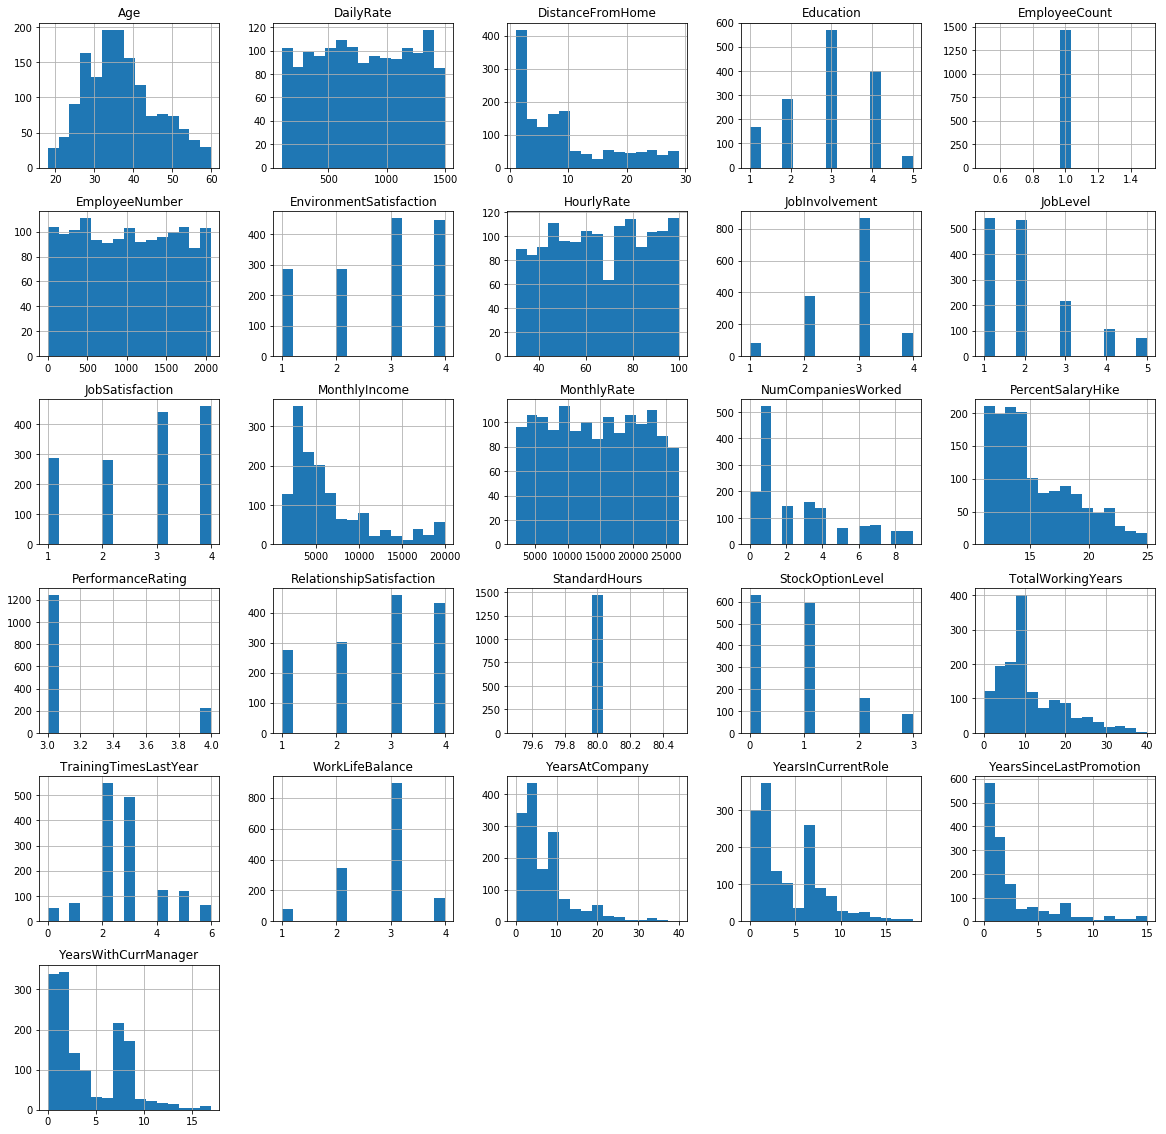

In [35]:
## Distribution for all variable

df.hist(figsize=(20, 20),bins = 15)
plt.show()

Few observation can be made:

- The age distribution is relatively normal with a litle right skewed, most employee are from the age around 24 - 25
- The monthly income is very much right skewed, which means that most employee have montly income around 5000
- The total working years also right skewed and most employee have been working in the company around les than 10 years and then drop significantly after that



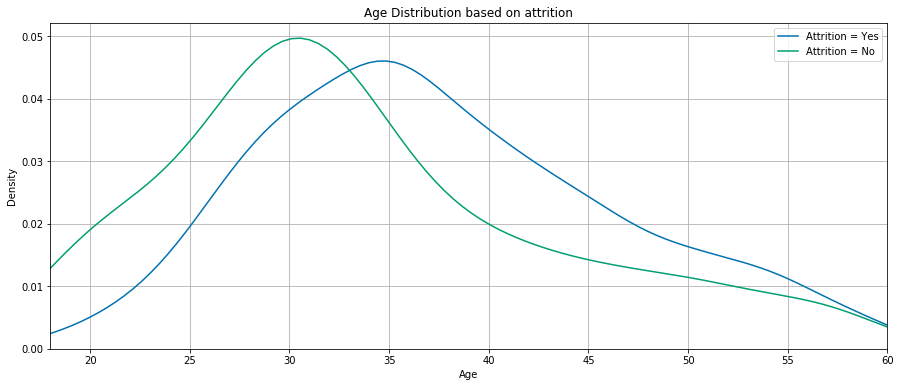

In [103]:
#Age distribution based on attrition

plt.figure(figsize=(15,6))

sns.kdeplot(df.loc[df['Attrition'] == 'No', 'Age'], label = 'Attrition = Yes')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'Age'], label = 'Attrition = No')

plt.grid(True)
plt.xlim(left=18, right=60) #Set limit because min age is 18 and max age is 60
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution based on attrition')
plt.show()

### In this plot i use KDE to measure at what age employee usually quits:
- We can see that relatively younger employee are tend to quit (precisely around the age of 30
- While employee at the age of 35+ mostly still in the company

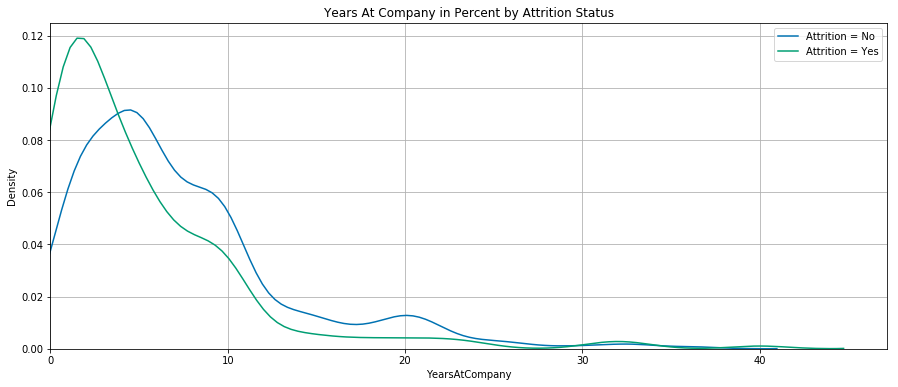

In [102]:
plt.figure(figsize=(15,6))

sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'], label = 'Attrition = No')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Attrition = Yes')

plt.grid(True)
plt.xlim(left=0)
plt.xlabel('YearsAtCompany')
plt.ylabel('Density')
plt.title('Years At Company based on Attrition Status')
plt.show()

### Years at company based on attrition

- We can see that most employee quits only around less than 4 years

This may be because the process of elimination by the employer or the employee itself felt not suited for the company

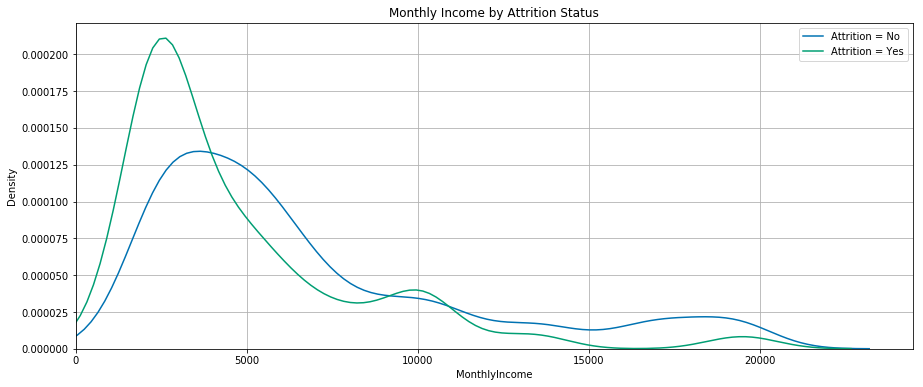

In [105]:
plt.figure(figsize=(15,6))

sns.kdeplot(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'], label = 'Attrition = No')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Attrition = Yes')

plt.grid(True)
plt.xlim(left=0)
plt.xlabel('MonthlyIncome')
plt.ylabel('Density')
plt.title('Monthly Income by Attrition Status')
plt.show()

In [100]:
## Check the amount of attrition based on job level

pd.crosstab(index=df['JobLevel'], columns=df['Attrition'],normalize='index')*100

Attrition,No,Yes
JobLevel,,
1,73.664825,26.335175
2,90.262172,9.737828
3,85.321101,14.678899
4,95.283019,4.716981
5,92.753623,7.246377


In [99]:
## Check the amount of attrition based on department

pd.crosstab(index=df['Department'], columns=df['Attrition'],normalize='index') *100

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


In [98]:
## Check the amount of attrition based on gender

pd.crosstab(index=df['Gender'], columns=df['Attrition'],normalize='index') *100

Attrition,No,Yes
Gender,,
Female,85.204082,14.795918
Male,82.993197,17.006803


### Based on those 3 tables:

- We can see that around 26% employee quits at job level 1, around 14% also quits at job level 3
- Relatively HR and Sales has similar attrition rate while RND has the lowest one
- Gender has relatively similar retention rate, thus cant make any decisive differences

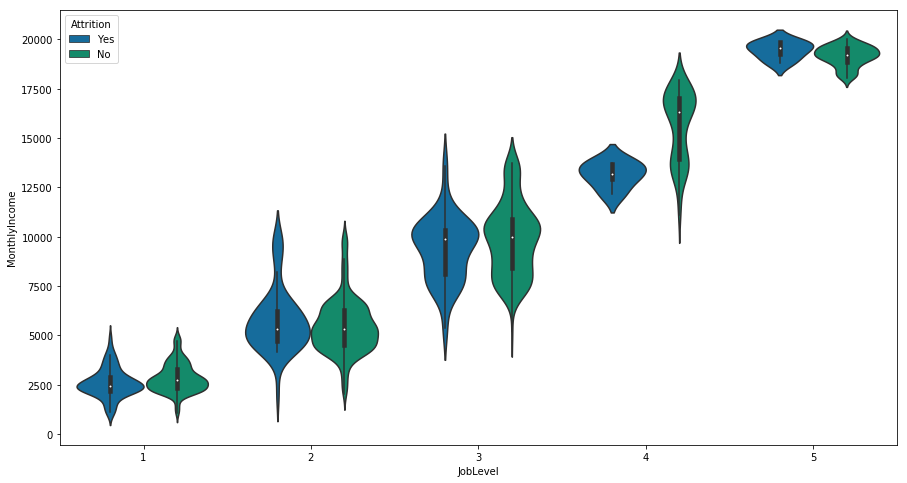

In [67]:
plt.figure(figsize=(15,8))

sns.violinplot(data=df,x='JobLevel', y='MonthlyIncome',hue= 'Attrition')
plt.show()

### Here is the distribution on monthly income based on job level and attrition

- Relatively in Job level 1,2,3 and 5 the job level and monthly income they receive is similar (attrition and not attrition), however in job level 4 there is a clear differences
- In job level 1 we can see that most employee have a monthly income of 2500
- at level 2 employee monthly income is around 5000, however, there are some that are paid less than 
- at level 4 however, we can see that active employee have monthly income distributed around 10k - 18k while ex employee (attrition) are mostly paid around 12.5k

At job level 4, this might be the turning point why some people choose to quit, it could be that because they already have high position but are paid far less than their co woeker with similar position

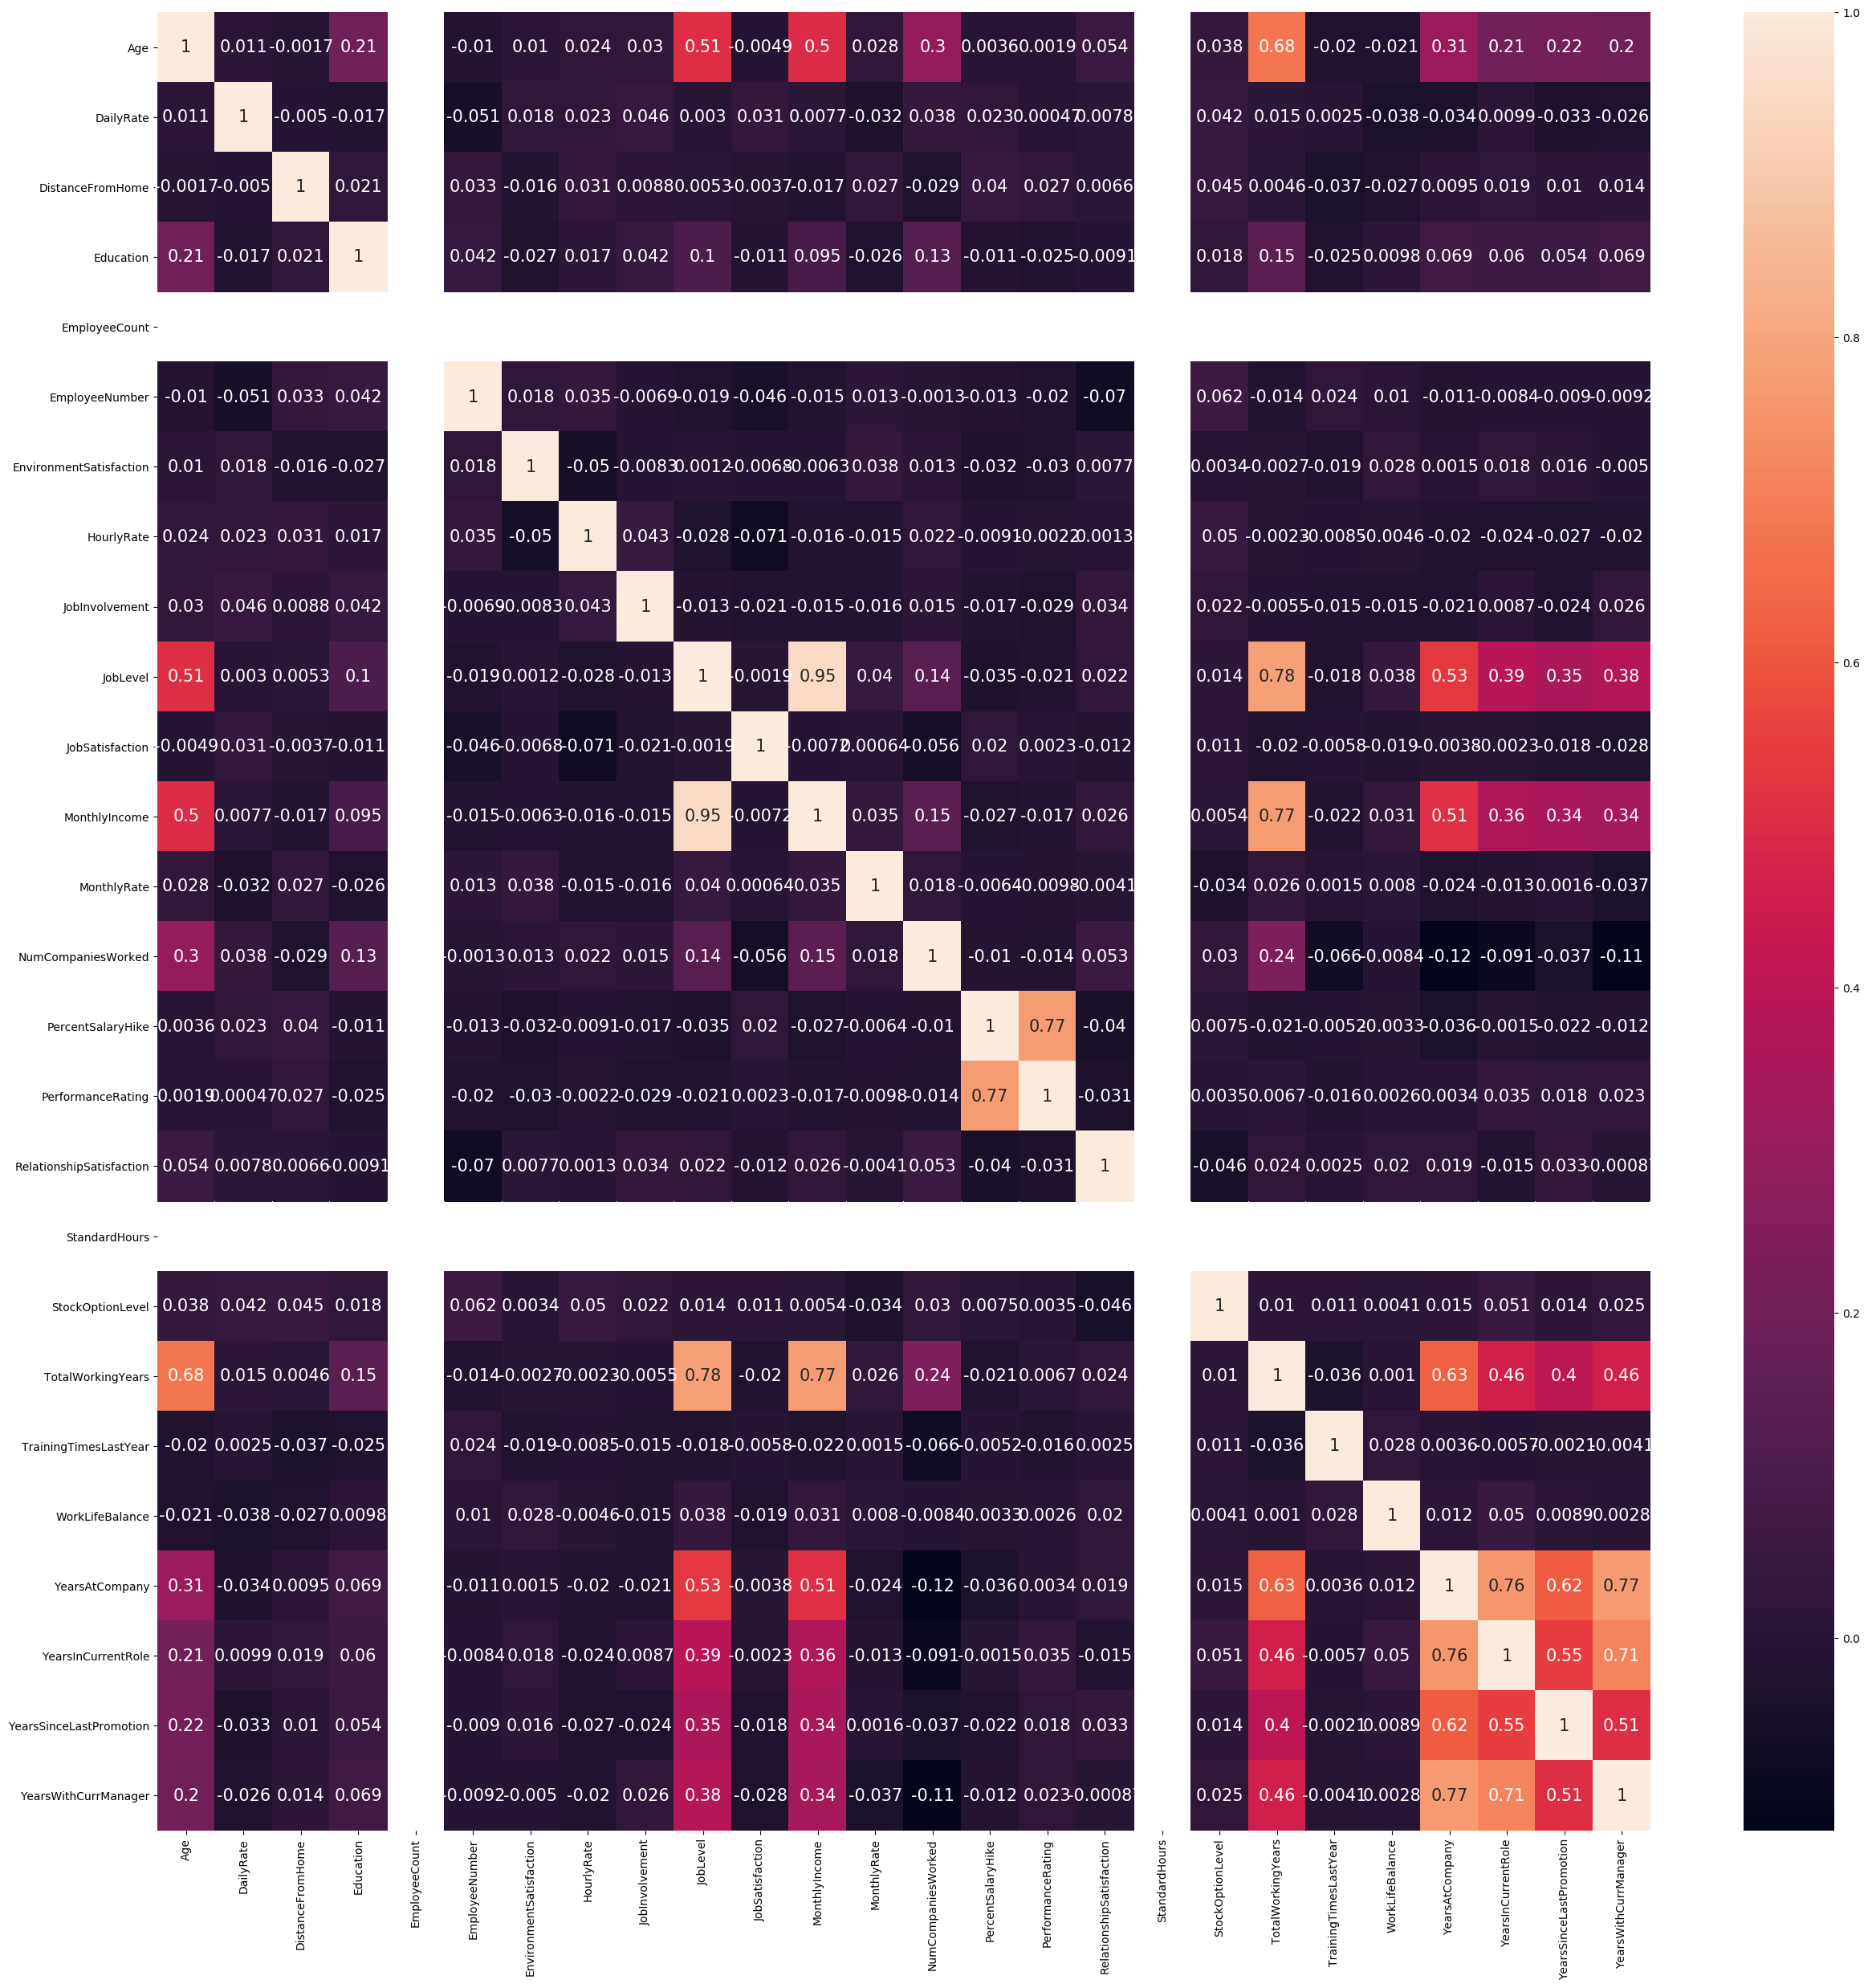

In [72]:
#Correlation Matrix

plt.figure(figsize=(30, 30),dpi=100)
sns.heatmap(df.corr(), annot=True, annot_kws={"size":15})
plt.show()

### Analysis on correlation

Because there are so many variables, i only conclude on the correlation that are highly correlated

- Monthly income is highly correlated with job level
- Monthly income is highly correlated with total working hours
- Job level is highly correlated with total working hours

## Conclusion and Recommendation

Based on the analysis there are some indicator why people are leaving:
- Monthly income is one of the most important factor why people are leaving.
    - Hence, employer should provide more competitive wages so that new employee have less attrition rate considering that new employee usually quits only few years after they're hired